In [40]:
import warnings
warnings.filterwarnings("ignore")
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# To extract featurs 

In [ ]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [ ]:
df = pd.read_csv('Audios_After_Filter.csv', index_col=0)

#create unique list of names
UniqueNames = df.class_name.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.class_name == key]
    
featuresdfKoN = DataFrameDict['Korean'].head(8838)
featuresdfArN = DataFrameDict['Arabic'].head(8838)
featuresdfEnN = DataFrameDict['English']
featuresdfJpN = DataFrameDict['Japanese']
featuresdfTkN = DataFrameDict['Turkish']

In [ ]:
# English
fulldatasetpath = 'Audios/en/'

metadata = featuresdfEnN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfEn = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfEn), 'files') 
featuresdfEn.head()

In [ ]:
# Arabic
fulldatasetpath = 'Audios/ar/'

metadata = featuresdfArN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfAr = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfAr), 'files') 
featuresdfAr.head()

In [ ]:
# Korean
fulldatasetpath = 'Audios/ko/'

metadata = featuresdfKoN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfKo = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfKo), 'files') 
featuresdfKo.head()

In [ ]:
# Turkish
fulldatasetpath = 'Audios/tr/'

metadata = featuresdfTkN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfTk = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfTk), 'files') 
featuresdfTk.head()

In [ ]:
# Japanese
fulldatasetpath = 'Audios/ja/'

metadata = featuresdfJpN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfJp = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfJp), 'files') 
featuresdfJp.head()

In [ ]:
featuresdf = pd.concat([featuresdfEn, featuresdfAr, featuresdfJp, featuresdfKo, featuresdfTk], ignore_index=True)
featuresdf.head()

In [ ]:
featuresdf['class_label'].value_counts()

## Get all audio features

In [45]:
# # English

# features = np.load('Features_without_padding/english.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfEn = pd.DataFrame(data)

# featuresdfEn['class_label'] = 'English'
# featuresdfEn.head()

,feature,class_label
0,"[-271.41968, 124.22315, -58.429943, 35.379055,...",English
1,"[-351.13943, 145.62364, -45.656147, 23.273306,...",English
2,"[-445.39618, 78.96912, -46.329502, 60.173794, ...",English
3,"[-346.8229, 119.39769, -28.215044, 52.076466, ...",English
4,"[-249.92691, 165.64842, -20.180883, 30.39974, ...",English


In [3]:
# # Arabic

# features = np.load('Features_without_padding/arabic.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfAr = pd.DataFrame(data)

# featuresdfAr['class_label'] = 'Arabic'
# featuresdfAr.head()

,feature,class_label
0,"[-208.25108, 157.91716, -13.101111, 23.241085,...",Arabic
1,"[-382.79947, 121.471, 17.170986, 26.888632, 7....",Arabic
2,"[-437.82678, 119.401146, -11.705071, 76.36924,...",Arabic
3,"[-222.2315, 174.87413, 25.402702, 25.123667, 7...",Arabic
4,"[-213.74483, 128.8699, 12.435904, 27.367086, 0...",Arabic


In [4]:
# # Japanese

# features = np.load('Features_without_padding/japanese.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfJp = pd.DataFrame(data)

# featuresdfJp['class_label'] = 'Japanese'
# featuresdfJp.head()

,feature,class_label
0,"[-470.8318, 101.896866, 14.821512, 15.64279, -...",Japanese
1,"[-335.91425, 134.12201, -4.371021, 26.67042, -...",Japanese
2,"[-375.5146, 106.97547, -22.865053, 42.647137, ...",Japanese
3,"[-276.95566, 107.48569, -51.40626, 64.51847, -...",Japanese
4,"[-376.25656, 99.327354, -19.961031, 47.301086,...",Japanese


In [5]:
# # Korean

# features = np.load('Features_without_padding/korean.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfKo = pd.DataFrame(data)

# featuresdfKo['class_label'] = 'Korean'
# featuresdfKo.head()

,feature,class_label
0,"[-197.54482, 165.90521, -15.778072, 30.247095,...",Korean
1,"[-280.90558, 158.40022, 0.58664733, 20.96752, ...",Korean
2,"[-412.97284, 84.16855, -48.078297, 52.204506, ...",Korean
3,"[-198.71002, 135.71985, -2.8408027, 39.78831, ...",Korean
4,"[-211.72827, 128.59625, -19.440556, 57.168488,...",Korean


In [6]:
# # Spanish

# features = np.load('Features_without_padding/spanish.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfSp = pd.DataFrame(data)

# featuresdfSp['class_label'] = 'Spanish'
# featuresdfSp.head()

,feature,class_label
0,"[-293.39813, 148.38182, -9.07623, 56.287926, -...",Spanish
1,"[-228.7525, 177.85493, -53.499584, 2.686866, -...",Spanish
2,"[-335.97803, 52.489067, -20.42385, 11.707087, ...",Spanish
3,"[-280.70386, 141.02701, -34.920864, 50.63744, ...",Spanish
4,"[-285.4787, 113.24655, -33.680553, 65.11993, -...",Spanish


In [7]:
# # Turkish

# features = np.load('Features_without_padding/turkish.npy') # load

# Fname = []
# ll=len(features-1)
# for i in range(ll) :
#     Fname.append(features[i])
    
# data = {'feature':Fname}
# featuresdfTk = pd.DataFrame(data)

# featuresdfTk['class_label'] = 'Turkish'
# featuresdfTk.head()

,feature,class_label
0,"[-285.34222, 147.04837, 10.427363, 48.675816, ...",Turkish
1,"[-261.67053, 137.72911, 0.974875, 53.205902, 1...",Turkish
2,"[-241.9859, 124.85667, -37.97344, 58.21001, -1...",Turkish
3,"[-279.2769, 106.38721, -53.04679, 45.060993, -...",Turkish
4,"[-190.65404, 164.01906, -34.948177, 49.64423, ...",Turkish


In [12]:
# featuresdf = pd.concat([featuresdfEn, featuresdfAr, featuresdfJp, featuresdfKo, featuresdfSp, featuresdfTk], ignore_index=True)
# featuresdf.head()

,feature,class_label
0,"[-271.41968, 124.22315, -58.429943, 35.379055,...",English
1,"[-351.13943, 145.62364, -45.656147, 23.273306,...",English
2,"[-445.39618, 78.96912, -46.329502, 60.173794, ...",English
3,"[-346.8229, 119.39769, -28.215044, 52.076466, ...",English
4,"[-249.92691, 165.64842, -20.180883, 30.39974, ...",English


In [14]:
# featuresdf['class_label'].value_counts()

Korean      11073
Arabic       9216
Turkish      8838
English      8533
Japanese     8035
Spanish      6667
Name: class_label, dtype: int64

In [16]:
# featuresdf = pd.concat([featuresdfEn, featuresdfAr.head(8838), featuresdfJp, featuresdfKo.head(8838), featuresdfTk], ignore_index=True)
# featuresdf.head()

,feature,class_label
0,"[-271.41968, 124.22315, -58.429943, 35.379055,...",English
1,"[-351.13943, 145.62364, -45.656147, 23.273306,...",English
2,"[-445.39618, 78.96912, -46.329502, 60.173794, ...",English
3,"[-346.8229, 119.39769, -28.215044, 52.076466, ...",English
4,"[-249.92691, 165.64842, -20.180883, 30.39974, ...",English


In [17]:
# featuresdf = pd.concat([featuresdfEn.head(6667), featuresdfAr.head(6667), featuresdfJp.head(6667), featuresdfKo.head(6667), featuresdfSp.head(6667), featuresdfTk.head(6667)], ignore_index=True)
# featuresdf.head()

## Prepare data for training

Use One-Hot encoder to encode the categorical text data (Languages), ...

In [23]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())

# Encode the classification labels
ohe = OneHotEncoder()
# yy = ohe.fit_transform(y)
yy = ohe.fit_transform(featuresdf.class_label.values.reshape(-1,1)).toarray()

In [24]:
yy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [25]:
ohe.categories_

[array(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish'], dtype=object)]

# Split the dataset

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42) # test 30% train 70%

# Creating & compiling the model 

In [27]:
# !pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Model creation
num_labels = yy.shape[1] 

model = Sequential()

model.add(Dense(256, input_shape=(40,))) # input_shape = X[0].shape > shape our featurs dimension 
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1

2022-12-02 01:19:40.807918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model Training

In [28]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

epochs_num = 200
batch_size_num = 32

checkpointer = ModelCheckpoint(filepath='best_models/model.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=batch_size_num, epochs=epochs_num, validation_data=(x_test, y_test), callbacks=[checkpointer])


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/200
934/943 [============================>.] - ETA: 0s - loss: 3.0211 - accuracy: 0.2102
Epoch 1: val_loss improved from inf to 1.60785, saving model to best_models/model.hdf5
943/943 [==============================] - 4s 3ms/step - loss: 3.0085 - accuracy: 0.2104 - val_loss: 1.6078 - val_accuracy: 0.2111
Epoch 2/200
925/943 [============================>.] - ETA: 0s - loss: 1.6129 - accuracy: 0.2133
Epoch 2: val_loss improved from 1.60785 to 1.60563, saving model to best_models/model.hdf5
943/943 [==============================] - 3s 3ms/step - loss: 1.6130 - accuracy: 0.2136 - val_loss: 1.6056 - val_accuracy: 0.2104
Epoch 3/200
937/943 [============================>.] - ETA: 0s - loss: 1.6061 - accuracy: 0.2215
Epoch 3: val_loss improved from 1.60563 to 1.59479, saving model to best_models/model.hdf5
943/943 [==============================] - 3s 3ms/step - loss: 1.6061 - accuracy: 0.2215 - val_loss: 1.5948 - val_accuracy: 0.2268
Epoch 4/200
940/943 [==========================

926/943 [============================>.] - ETA: 0s - loss: 1.1273 - accuracy: 0.5532
Epoch 27: val_loss did not improve from 1.04448
943/943 [==============================] - 3s 3ms/step - loss: 1.1273 - accuracy: 0.5534 - val_loss: 1.0662 - val_accuracy: 0.6043
Epoch 28/200
931/943 [============================>.] - ETA: 0s - loss: 1.1251 - accuracy: 0.5528
Epoch 28: val_loss did not improve from 1.04448
943/943 [==============================] - 2s 3ms/step - loss: 1.1243 - accuracy: 0.5532 - val_loss: 1.0467 - val_accuracy: 0.6071
Epoch 29/200
930/943 [============================>.] - ETA: 0s - loss: 1.1161 - accuracy: 0.5603
Epoch 29: val_loss improved from 1.04448 to 1.03941, saving model to best_models/model.hdf5
943/943 [==============================] - 2s 3ms/step - loss: 1.1162 - accuracy: 0.5600 - val_loss: 1.0394 - val_accuracy: 0.6230
Epoch 30/200
930/943 [============================>.] - ETA: 0s - loss: 1.1163 - accuracy: 0.5554
Epoch 30: val_loss improved from 1.03941

920/943 [============================>.] - ETA: 0s - loss: 1.0408 - accuracy: 0.5970
Epoch 55: val_loss did not improve from 0.92519
943/943 [==============================] - 2s 3ms/step - loss: 1.0408 - accuracy: 0.5970 - val_loss: 0.9364 - val_accuracy: 0.6668
Epoch 56/200
932/943 [============================>.] - ETA: 0s - loss: 1.0482 - accuracy: 0.5922
Epoch 56: val_loss did not improve from 0.92519
943/943 [==============================] - 2s 3ms/step - loss: 1.0484 - accuracy: 0.5922 - val_loss: 0.9523 - val_accuracy: 0.6675
Epoch 57/200
939/943 [============================>.] - ETA: 0s - loss: 1.0386 - accuracy: 0.5929
Epoch 57: val_loss did not improve from 0.92519
943/943 [==============================] - 2s 3ms/step - loss: 1.0386 - accuracy: 0.5930 - val_loss: 0.9304 - val_accuracy: 0.6819
Epoch 58/200
940/943 [============================>.] - ETA: 0s - loss: 1.0364 - accuracy: 0.5934
Epoch 58: val_loss improved from 0.92519 to 0.91801, saving model to best_models/mod

929/943 [============================>.] - ETA: 0s - loss: 1.0012 - accuracy: 0.6144
Epoch 84: val_loss did not improve from 0.88674
943/943 [==============================] - 2s 3ms/step - loss: 1.0005 - accuracy: 0.6149 - val_loss: 0.8979 - val_accuracy: 0.6788
Epoch 85/200
924/943 [============================>.] - ETA: 0s - loss: 1.0039 - accuracy: 0.6087
Epoch 85: val_loss did not improve from 0.88674
943/943 [==============================] - 2s 3ms/step - loss: 1.0054 - accuracy: 0.6089 - val_loss: 0.9043 - val_accuracy: 0.6925
Epoch 86/200
935/943 [============================>.] - ETA: 0s - loss: 1.0072 - accuracy: 0.6082
Epoch 86: val_loss did not improve from 0.88674
943/943 [==============================] - 2s 2ms/step - loss: 1.0079 - accuracy: 0.6077 - val_loss: 0.9198 - val_accuracy: 0.6817
Epoch 87/200
930/943 [============================>.] - ETA: 0s - loss: 1.0072 - accuracy: 0.6102
Epoch 87: val_loss did not improve from 0.88674
943/943 [===========================

943/943 [==============================] - 3s 3ms/step - loss: 0.9882 - accuracy: 0.6207 - val_loss: 0.8898 - val_accuracy: 0.6911
Epoch 114/200
940/943 [============================>.] - ETA: 0s - loss: 0.9849 - accuracy: 0.6207
Epoch 114: val_loss did not improve from 0.86954
943/943 [==============================] - 3s 3ms/step - loss: 0.9847 - accuracy: 0.6208 - val_loss: 0.8776 - val_accuracy: 0.6992
Epoch 115/200
941/943 [============================>.] - ETA: 0s - loss: 0.9839 - accuracy: 0.6216
Epoch 115: val_loss did not improve from 0.86954
943/943 [==============================] - 3s 3ms/step - loss: 0.9842 - accuracy: 0.6214 - val_loss: 0.8808 - val_accuracy: 0.6919
Epoch 116/200
938/943 [============================>.] - ETA: 0s - loss: 0.9928 - accuracy: 0.6186
Epoch 116: val_loss did not improve from 0.86954
943/943 [==============================] - 3s 3ms/step - loss: 0.9930 - accuracy: 0.6186 - val_loss: 0.8743 - val_accuracy: 0.6973
Epoch 117/200
935/943 [=========

936/943 [============================>.] - ETA: 0s - loss: 0.9716 - accuracy: 0.6297
Epoch 142: val_loss did not improve from 0.85933
943/943 [==============================] - 2s 3ms/step - loss: 0.9721 - accuracy: 0.6295 - val_loss: 0.8812 - val_accuracy: 0.7061
Epoch 143/200
935/943 [============================>.] - ETA: 0s - loss: 0.9811 - accuracy: 0.6258
Epoch 143: val_loss improved from 0.85933 to 0.85498, saving model to best_models/model.hdf5
943/943 [==============================] - 2s 3ms/step - loss: 0.9814 - accuracy: 0.6256 - val_loss: 0.8550 - val_accuracy: 0.7037
Epoch 144/200
929/943 [============================>.] - ETA: 0s - loss: 0.9764 - accuracy: 0.6315
Epoch 144: val_loss did not improve from 0.85498
943/943 [==============================] - 2s 3ms/step - loss: 0.9767 - accuracy: 0.6311 - val_loss: 0.8673 - val_accuracy: 0.7080
Epoch 145/200
933/943 [============================>.] - ETA: 0s - loss: 0.9703 - accuracy: 0.6303
Epoch 145: val_loss did not improv

Epoch 171/200
920/943 [============================>.] - ETA: 0s - loss: 0.9652 - accuracy: 0.6321
Epoch 171: val_loss did not improve from 0.84129
943/943 [==============================] - 3s 3ms/step - loss: 0.9661 - accuracy: 0.6318 - val_loss: 0.8699 - val_accuracy: 0.7017
Epoch 172/200
920/943 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.6306
Epoch 172: val_loss did not improve from 0.84129
943/943 [==============================] - 2s 3ms/step - loss: 0.9708 - accuracy: 0.6314 - val_loss: 0.8746 - val_accuracy: 0.6909
Epoch 173/200
943/943 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6349
Epoch 173: val_loss improved from 0.84129 to 0.83911, saving model to best_models/model.hdf5
943/943 [==============================] - 3s 3ms/step - loss: 0.9630 - accuracy: 0.6349 - val_loss: 0.8391 - val_accuracy: 0.7199
Epoch 174/200
928/943 [============================>.] - ETA: 0s - loss: 0.9653 - accuracy: 0.6330
Epoch 174: val_loss 

Epoch 200/200
938/943 [============================>.] - ETA: 0s - loss: 0.9550 - accuracy: 0.6372
Epoch 200: val_loss did not improve from 0.83587
943/943 [==============================] - 3s 3ms/step - loss: 0.9555 - accuracy: 0.6368 - val_loss: 0.8515 - val_accuracy: 0.7025
Training completed in time:  0:08:45.536248


# Model Accuracy (Testing)

In [29]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.7348542809486389
Testing Accuracy:  0.7025145292282104


In [30]:
predictions = model.predict(x_test, verbose=0)
predictions = to_categorical(np.argmax(predictions, axis=1), num_labels) # Last one is number of categories

cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

[[1562  442   17  333  252]
 [  65 2223   26  144  167]
 [  77  413 1542  261  110]
 [  80  430   44 1913  163]
 [  70  523   25  203 1840]]


In [31]:
predictions

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

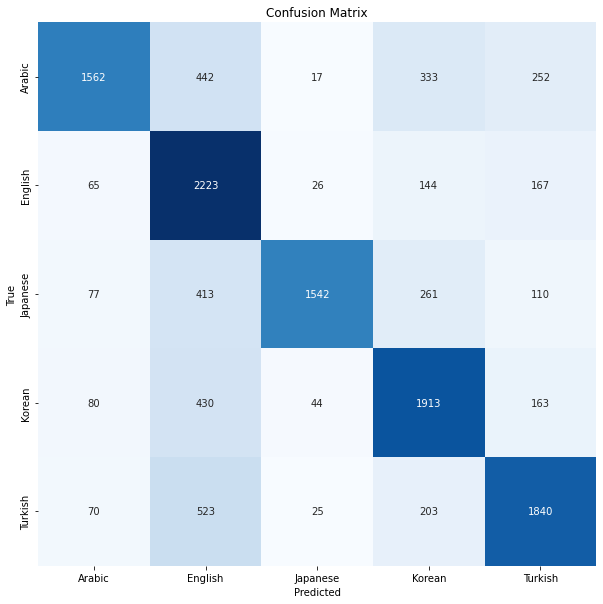

In [33]:
plt.figure(figsize = (10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish'])
ax.yaxis.set_ticklabels(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish']); 

# Model Validation  (Direct Predictions)

In [43]:
import librosa 
import numpy as np 

# Extract Features for every file (Mel-Frequency Cepstral Coefficients (MFCC))
def extract_feature(file_name):
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])


def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 
    predicted_vector = model.predict(prediction_feature, verbose=0)
    predicted_vector = to_categorical(np.argmax(predicted_vector, axis=1), num_labels)
    predicted_class = ohe.inverse_transform(predicted_vector) 
    print("The predicted languages is:", predicted_class[0][0], '\n')
    
    predicted_proba_vector = model.predict(prediction_feature, verbose=0) 
    predicted_proba = predicted_proba_vector[0]
    Labels = np.array(ohe.categories_[0])
    print('Result probability for each class:')
    for i in range(len(Labels)): 
        print(Labels[i], ": ", format(predicted_proba[i], '.8f'))


In [35]:
# https://voicecoach.ai/voice-recorder

In [44]:
# English
filename = 'en.wav' 
print_prediction(filename) 

<class 'numpy.ndarray'>
408
The predicted languages is: English 

Result probability for each class:
Arabic :  0.13087301
English :  0.35455301
Japanese :  0.08685741
Korean :  0.11329740
Turkish :  0.31441915


In [37]:
# English
filename = 'en_me.wav' 
print_prediction(filename) 

The predicted languages is: Japanese 

Result probability for each class:
Arabic :  0.00686242
English :  0.01243372
Japanese :  0.55962700
Korean :  0.40331453
Turkish :  0.01776242


In [38]:
# Arabic
filename = 'ar.wav' 
print_prediction(filename) 

The predicted languages is: Arabic 

Result probability for each class:
Arabic :  0.25819707
English :  0.20822124
Japanese :  0.11595793
Korean :  0.25676677
Turkish :  0.16085699


In [39]:
# Arabic
filename = 'ar_me.wav' 
print_prediction(filename) 

The predicted languages is: Korean 

Result probability for each class:
Arabic :  0.16876325
English :  0.14801230
Japanese :  0.11638863
Korean :  0.37414512
Turkish :  0.19269077


# -------------------